# 🏦 Sentiment & Thematic Analysis of Bank User Reviews

This notebook documents a two-part analysis of user reviews for various banks:

1. **Sentiment Analysis** to quantify how users feel about their experience.
2. **Thematic Analysis** to extract recurring topics and issues across reviews.

---

## 🧠 Task Overview

### ✅ Sentiment Analysis
We aimed to classify the sentiment of user reviews as **positive**, **negative**, or **neutral** using:

- **Model**: `distilbert-base-uncased-finetuned-sst-2-english`
  - Optionally compared with `VADER` or `TextBlob` for lighter benchmarking
- **Aggregation**: Sentiment scores were averaged by:
  - `Bank Name`
  - `Star Rating` (e.g., mean sentiment for 1-star reviews)
- **Output**: Each review is labeled with:
  - `Sentiment Label` (Positive/Negative/Neutral)
  - `Sentiment Score` (from the model)

---

### 🎯 Thematic Analysis
Thematic analysis extracts key issues and suggestions frequently mentioned in user feedback.

#### 📌 Steps:
1. **Preprocessing** with `spaCy` & `pandas`:
   - Lowercasing, punctuation removal, stopword removal
   - Tokenization and lemmatization
2. **Keyword & N-Gram Extraction**:
   - Used `TF-IDF` vectorizer and spaCy noun chunks
   - Extracted bigrams and trigrams (e.g., *"login issue"*, *"app crash"*)

3. **Rule-Based Clustering into Themes**:
   - Keywords were manually grouped into 3–5 **overarching themes per bank**.

#### 💡 Example Themes:
- **Account Access Issues** — login errors, authentication problems
- **Transaction Performance** — transfer delays, payment failures
- **User Interface & Experience** — design, usability, app speed
- **Customer Support** — response time, helpdesk, agent attitude
- **Feature Requests** — suggestions for new functionalities

---

## 🔄 Full Pipeline Summary

| Step | Description |
|------|-------------|
| 1. Sentiment Analysis | Label reviews using DistilBERT SST-2  |
| 2. Data Preprocessing | Cleaning, tokenizing, stopword removal, lemmatization |
| 3. Keyword Extraction | TF-IDF or spaCy chunking for unigram/bigram/trigram |
| 4. Theme Grouping | Manual or topic model-assisted keyword clustering |
| 5. Aggregation | Group sentiment and themes by bank & rating |
| 6. CSV Export | Save processed results to CSV for reporting |

---

## 💾 Output CSV Structure

Final results were saved to a CSV file with the following structure:

| Column Name | Description |
|-------------|-------------|
| `bank_name` | Name of the bank |
| `review_text` | Cleaned user review |
| `rating` | User star rating |
| `sentiment_label` | Positive / Negative / Neutral |
| `sentiment_score` | Probability/confidence score |
| `keywords` | Extracted significant words/phrases |
| `identified_theme(s)` | Assigned themes|

---

## 🛠️ Libraries & Tools Used
- `transformers`, `torch` – for DistilBERT model inference
- `spaCy`, `nltk`, `scikit-learn` – for preprocessing, lemmatization, TF-IDF
- `pandas`, `numpy` – for data manipulation


---

_This analysis enables banks to not only quantify customer sentiment but also understand what specific experiences drive that sentiment, helping prioritize areas for service and product improvement._


## 🧠 Sentiment Scoring with DistilBERT

In this step, we apply a pre-trained sentiment analysis model to compute sentiment scores for each user review and assign a sentiment label (positive, neutral, or negative) based on the score.

---

### 🔍 What This Code Does:

1. **Import Required Modules**
   - Appends the custom `../scripts` directory to the system path.
   - Imports a custom `SentimentAnalyzer` class from the `sentiment_analysis` module.

2. **Load Cleaned Review Data**
   - Reads preprocessed review text from `../data/cleaned_reviews.csv` into a Pandas DataFrame.

3. **Define Sentiment Labeling Logic**
   - A helper function `sentiment_label(score)` categorizes the output score:
     - `score > 0.7` → `"positive"`
     - `score < 0.3` → `"negative"`
     - Otherwise → `"neutral"`

4. **Run Sentiment Analysis**
   - Initializes the `SentimentAnalyzer` object.
   - Applies the `analyze()` method to each review to generate a sentiment score (likely using DistilBERT behind the scenes).
   - Applies the `sentiment_label()` function to map each score to a label.

5. **Export Results**
   - Saves the updated DataFrame with sentiment scores and labels to `../data/cleaned_reviews_with_sentiment.csv`.

---

### ✅ Output

The output CSV contains the following new columns:
- `sentiment_score`: A float representing the confidence or sentiment polarity.
- `sentiment_label`: A label (`positive`, `neutral`, `negative`) derived from the score.

This prepares the data for sentiment aggregation, visualization, or integration with the thematic analysis step.


In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../scripts"))
from sentiment_analysis import SentimentAnalyzer


cleaned_reviews = pd.read_csv("../data/cleaned_reviews.csv")

analyzer = SentimentAnalyzer()

def sentiment_label(score):
    if score > 0.7:
        return "positive"
    elif score < 0.3:
        return "negative"
    else:
        return "neutral"

def main():
    cleaned_reviews["sentiment_score"] = cleaned_reviews["review"].apply(analyzer.analyze)
    cleaned_reviews["sentiment_label"] = cleaned_reviews["sentiment_score"].apply(sentiment_label)
    cleaned_reviews.to_csv("../data/cleaned_reviews_with_sentiment.csv", index=False)
    
main()



c:\Users\segni\Documents\GitHub\banking-app-review-analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [2]:
cleaned_reviews.head()

,app_id,app_name,user_name,review,rating,thumbs_up_count,date,sentiment_score,sentiment_label
0,com.combanketh.mobilebanking,Combanketh,A Google user,what is this app problem???,1,0,2025-06-05 22:16:56,0.000377,negative
1,com.combanketh.mobilebanking,Combanketh,A Google user,the app is proactive and a good connections.,5,0,2025-06-05 15:55:10,0.999868,positive
2,com.combanketh.mobilebanking,Combanketh,A Google user,I cannot send to cbebirr app. through this app.,3,0,2025-06-05 11:12:49,0.004665,negative
3,com.combanketh.mobilebanking,Combanketh,A Google user,good,4,0,2025-06-05 10:21:59,0.999816,positive
4,com.combanketh.mobilebanking,Combanketh,A Google user,not functional,1,0,2025-06-05 07:38:12,0.000221,negative


In [3]:
cleaned_reviews.sentiment_label.value_counts()

sentiment_label
positive    4085
negative    2145
neutral      263
Name: count, dtype: int64

In [4]:
cleaned_reviews.isna().sum()

app_id             0
app_name           0
user_name          0
review             0
rating             0
thumbs_up_count    0
date               0
sentiment_score    0
sentiment_label    0
dtype: int64

### **Aggregate by bank and rating (e.g., mean sentiment for 1-star reviews).**

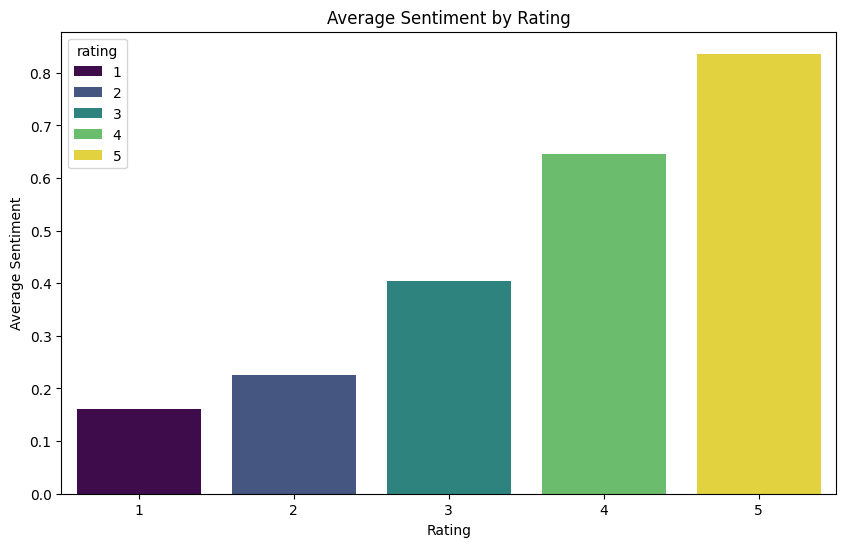

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
group_by_rating = cleaned_reviews.groupby("rating")["sentiment_score"].mean().reset_index()
sns.barplot(data=group_by_rating, x="rating", y="sentiment_score", hue="rating", palette="viridis")
plt.title("Average Sentiment by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")

plt.savefig("../reports/figures/sentiment_by_rating.png")
plt.show()

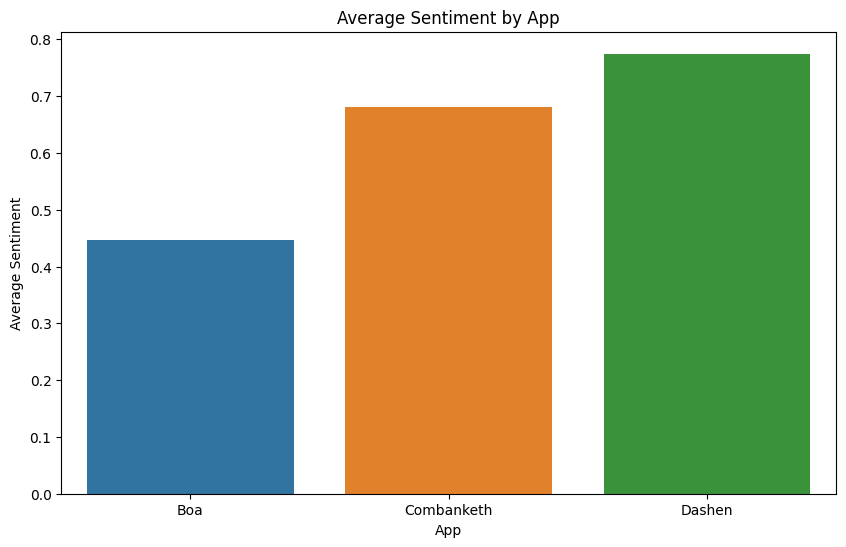

In [ ]:
plt.figure(figsize=(10, 6))
group_by_app = cleaned_reviews.groupby("app_name")["sentiment"].mean().reset_index()
sns.barplot(data=group_by_app, x="app_name", y="sentiment", hue="app_name")
plt.title("Average Sentiment by App")
plt.xlabel("App")
plt.ylabel("Average Sentiment")

plt.savefig("../reports/figures/sentiment_by_app.png")
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_2644\2170335437.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  barplot = sns.barplot(


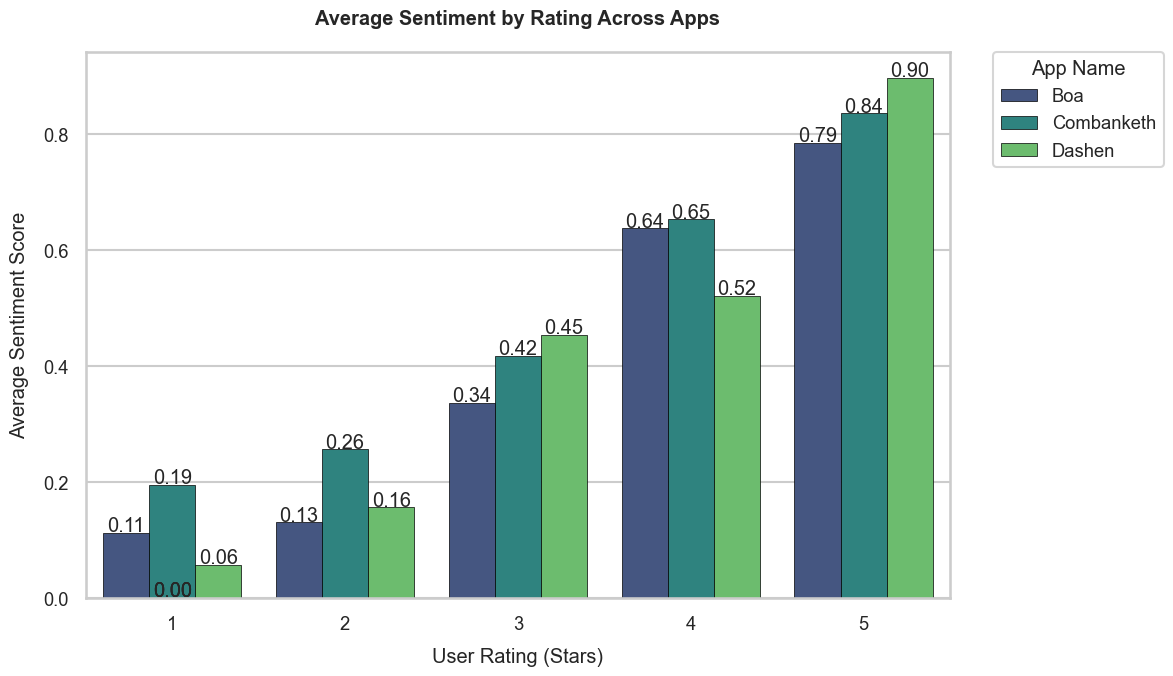

In [8]:
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

plt.figure(figsize=(12, 7))


group_by_rating_and_app = cleaned_reviews.groupby(["rating", "app_name"])["sentiment_score"].mean().reset_index()


barplot = sns.barplot(
    data=group_by_rating_and_app,
    x="rating",
    y="sentiment_score",
    hue="app_name",
    palette="viridis",
    edgecolor="black",
    linewidth=0.5, 
    errwidth=1 
)

plt.title("Average Sentiment by Rating Across Apps", pad=20, fontweight="bold")
plt.xlabel("User Rating (Stars)", labelpad=10)
plt.ylabel("Average Sentiment Score", labelpad=10)


plt.legend(
    title="App Name",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()


plt.savefig(
    "../reports/figures/sentiment_by_rating_and_app.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False
)

plt.show()

## **Thematic Analysis**

In [9]:
theme_rules = {
    'account_access': {
        'login', 'sign in', 'authenticate', 'biometric', 'face id', 'touch id', 'fingerprint',
        'password', 'pin', '2fa', 'two factor', 'verify', 'lock out',
        'session', 'timeout', 'account', 'recover', 'access', 'deny',
        'forgot', 'username', 'credential', 'register', 'signup', 'onboard',
        'device registration', 'security question', 'sms code', 'email code', 'reset',
        'trouble logging', 'cannot sign in', 'account locked', 'forgot password',
        'enroll', 'new user'
    },
    
    'app_performance': {
        'crash', 'freeze', 'hang', 'lag', 'slow', 'perform', "good",
        "fast", "quick", "response", "smooth", "efficient",
        'bug', 'glitch', 'error', 'respond', 'unstable', 'load',
        'refresh', 'restart', 'close', 'memory', 'storage', "nice", 
        "great", "excellent", "awesome", "perfect", "love", 'like',
        'optimize', 'speed', 'responsive', 'drain', 'battery', 'data usage', 'offline mode',
        'app not opening', 'force close', 'freezing', 'stuttering',
        'heating device', 'resource intensive'
    },
    
    'transaction': {
        'transfer', 'send money', 'receive money', 'payment', 'pay bill', 'pay utility',
        'transaction', 'fail', 'decline', 'pending', 'delay', 'post', 'clear',
        'instant transfer', 'process', 'limit', 'amount', 'recipient', 'beneficiary',
        'schedule payment', 'recurring payment', 'cancel transaction', 'reverse transaction', 'transaction history',
        'deposit', 'withdraw', 'fund', 'card payment', 'debit', 'credit', 'invoice',
        'statement', 'refund', 'charge', 'dispute', 'standing order', 'direct debit',
        'cheque deposit', 'mobile deposit', 'loan payment', 'credit card payment',
        'international transfer', 'currency exchange', 'fx rate',
        'settlement', 'receipt', 'proof of payment'
    },
    
    'ui_ux': {
        'interface', 'design', 'layout', 'navigate', 'menu', 'sidebar', 'tabs',
        'button', 'icon', 'display', 'read', 'intuitive', 'easy to use',
        'user friendly', 'complicate', 'confuse', 'modern', 'clutter', 'clean',
        'ugly', 'beautiful', 'dark mode', 'light mode', 'theme', 'font', 'size', 'color',
        'popup', 'tutorial', 'onboarding flow', 'navigation', 'dashboard', 'overview',
        'readability', 'accessibility', 'contrast', 'text size', 'magnification',
        'voiceover', 'screen reader', 'haptic feedback', 'gestures', 'keyboard navigation',
        'localization', 'language option', 'cultural relevance',
        'awkward', 'smooth', 'seamless', 'flow'
    },
    
    'security_privacy': {
        'secure', 'privacy', 'data protection', 'protect', 'encrypt', 'encryption',
        'fraud', 'scam', 'phishing', 'hack', 'breach', 'leak', 'data leak',
        'permission', 'consent', 'track', 'biometric', 'authenticate', 'authentication',
        'safe', 'vulnerable', 'exploit', 'warning', 'risk', 'compliance',
        'two-factor authentication', 'mfa', 'alert', 'suspicious activity', 'unauthorized',
        'data sharing', 'regulatory', 'KYC', 'AML', 'opt-out', 'data policy',
        'terms of service', 'trust', 'compromised account'
    },
    
    'customer_support': {
        'support', 'help', 'contact', 'assist', 'service', 'customer service',
        'respond', 'representative', 'wait time', 'call center', 'resolve', 'solution',
        'email support', 'chat support', 'phone support', 'escalate', 'complain',
        'ticket', 'agent', 'unhelpful', 'rude', 'knowledgeable', 'faq', 'chatbot',
        'branch visit', 'in-app messaging', 'delay in response', 'automated', 'human agent',
        'empathy', 'understanding', 'language barrier', 'communication'
    },
    
    'notification_communication': {
        'notify', 'alert', 'remind', 'message', 'inbox', 'push notification',
        'email notification', 'sms alert', 'sound', 'vibrate', 'frequent', 'spam',
        'customize notifications', 'turn off', 'mute', 'promo', 'marketing',
        'irrelevant', 'control settings', 'transaction alert', 'low balance alert',
        'payment reminder', 'security alert', 'news', 'updates', 'announcement',
        'opt-in', 'unsubscribe'
    },
    
    'account_management': {
        'profile', 'settings', 'preferences', 'personal information', 'update',
        'change address', 'change phone', 'change email', 'verify identity', 'document upload',
        'id verification', 'address proof', 'close account', 'delete account', 'deactivate account', 'reactivate account',
        'manage account', 'account options', 'edit details', 'name change', 'DOB update',
        'add account', 'link account', 'statement preference', 'e-statement',
        'joint account management', 'minor account', 'business account settings',
        'legal name', 'preferred name'
    },
    
    'financial_tools': {
        'budget', 'spending tracker', 'analyze spending', 'report', 'insight', 'trend',
        'save', 'savings goal', 'financial plan', 'forecast', 'category', 'tag', 'categorize',
        'receipt scan', 'export data', 'csv', 'excel', 'pdf', 'spreadsheet',
        'invest', 'stock', 'crypto', 'loan', 'credit score', 'insurance', 'wealth management',
        'digital wallet', 'portfolio', 'interest rate', 'APY', 'APR', 'debt management',
        'money manager', 'financial planning', 'retirement planning', 'investment option',
        'budgeting tools', 'expense tracking', 'income tracking', 'net worth',
        'financial literacy', 'education material', 'guidance', 'advisor',
        'sharia compliant', 'ethical investment'
    },
    
    'feature_request_innovation': {
        'suggest', 'recommend', 'wishlist', 'want', 'need', 'desire',
        'should have', 'could have', 'improve', 'enhance', 'add feature',
        'include', 'missing feature', 'future development', 'roadmap', 'vote', 'request',
        'new feature', 'idea', 'innovate', 'consider', 'implement', 'plan to add',
        'next update', 'roadmap', 'beta program', 'pilot feature',
        'suggestion box', 'feedback form', 'user forum'
    },
    
    'integration_compatibility': {
        'integrate', 'connect', 'link account', 'partner', 'external service',
        'google pay', 'apple pay', 'samsung pay', 'paypal', 'venmo', 'zelle',
        'plaid', 'quickbooks', 'mint', 'other bank connection', 'third-party apps',
        'api', 'sync', 'compatible', 'wearable payment', 'smartwatch',
        'voice assistant', 'siri', 'google assistant', 'alexa',
        'operating system', 'ios', 'android', 'device model', 'old phone', 'new phone'
    },

    'card_management': {
        'card', 'debit card', 'credit card', 'virtual card', 'prepaid card',
        'activate card', 'deactivate card', 'block card', 'unblock card',
        'replace card', 'order card', 'card pin', 'change pin', 'manage card',
        'lost card', 'stolen card', 'card control', 'spend limits', 'freeze card',
        'travel notice', 'card reader', 'digital card', 'card design',
        'physical card', 'card delivery'
    },

    'loan_mortgage': {
        'loan', 'personal loan', 'auto loan', 'mortgage', 'home loan', 'refinance',
        'apply loan', 'loan status', 'loan application', 'interest rate', 'emi',
        'repayment', 'loan statement', 'debt consolidation', 'loan calculator', 'pre-approve',
        'loan offer', 'eligibility', 'loan term', 'collateral'
    },

    'branch_atm_services': {
        'branch', 'atm', 'teller', 'cash deposit', 'cash withdraw', 'atm locator',
        'branch locator', 'queue', 'waiting time', 'customer service at branch',
        'deposit machine', 'cash machine', 'counter service', 'bank hours', 'holiday hours',
        'drive-thru', 'accessible branch', 'ramp access', 'wheelchair access'
    },

    'account_types_onboarding': {
        'checking account', 'savings account', 'current account', 'joint account',
        'student account', 'business account', 'kids account', 'investment account',
        'open account', 'account type', 'statement', 'balance', 'overdraft',
        'initial setup', 'account creation', 'digital onboarding', 'paperwork',
        'account linking', 'multiple accounts'
    },

    'rewards_offers_promotions': {
        'rewards', 'points', 'cashback', 'offer', 'discount', 'promotion',
        'loyalty program', 'redeem', 'earn', 'bonus', 'deal', 'exclusive',
        'referral', 'sign-up bonus', 'limited time offer', 'partnership offer'
    },
    
    'general_feedback': {
        'overall', 'experience', 'general', 'feedback', 'app', 'platform',
        'satisfied', 'dissatisfied', 'happy', 'unhappy', 'frustrate', 'disappoint',
        'worth', 'recommend', 'good', 'bad', 'problem', 'issue', 'concern',
        'expect', 'hope', 'future', 'comment', 'review', 'rating', 'star',
        'usability', 'value for money', 'reliability', 'trustworthiness',
        'comparison', 'better than'
    },
    
    'technical_issues_connectivity': {
        'technical', 'issue', 'problem', 'error code', 'debug', 'log',
        'system', 'server', 'down', 'maintenance', 'outage', 'connection',
        'network', 'wifi', 'cellular', 'data', 'update', 'version', 'compatible',
        'internet', 'connectivity', 'offline', 'glitch', 'buggy', 'frozen screen',
        'app not responding', 'installation', 'uninstall'
    },

    'billing_pricing_fees': {
        'price', 'cost', 'fee', 'charge', 'subscription', 'premium',
        'free', 'tier', 'plan', 'discount', 'promo', 'offer', 'expensive',
        'cheap', 'value', 'refund', 'invoice', 'receipt', 'tax',
        'hidden fees', 'transparent pricing', 'annual fee', 'monthly fee',
        'currency conversion fee', 'transaction fee'
    },

    'education_guidance_help': {
        'tutorial', 'guide', 'learn', 'understand', 'explain', 'how to',
        'faq', 'help center', 'documentation', 'tip', 'advice', 'clarify',
        'instruction', 'demo', 'example', 'glossary', 'knowledge base',
        'explain terms', 'simplify', 'easy to understand'
    }
}

In [10]:
from theme_extraction import ReviewThematicAnalyzer

thematic_analyzer = ReviewThematicAnalyzer(theme_rules=theme_rules)

print("columns in cleaned_reviews:", cleaned_reviews.columns)


columns in cleaned_reviews: Index(['app_id', 'app_name', 'user_name', 'review', 'rating',
       'thumbs_up_count', 'date', 'sentiment_score', 'sentiment_label'],
      dtype='object')


In [11]:
cleaned_reviews.head()

,app_id,app_name,user_name,review,rating,thumbs_up_count,date,sentiment_score,sentiment_label
0,com.combanketh.mobilebanking,Combanketh,A Google user,what is this app problem???,1,0,2025-06-05 22:16:56,0.000377,negative
1,com.combanketh.mobilebanking,Combanketh,A Google user,the app is proactive and a good connections.,5,0,2025-06-05 15:55:10,0.999868,positive
2,com.combanketh.mobilebanking,Combanketh,A Google user,I cannot send to cbebirr app. through this app.,3,0,2025-06-05 11:12:49,0.004665,negative
3,com.combanketh.mobilebanking,Combanketh,A Google user,good,4,0,2025-06-05 10:21:59,0.999816,positive
4,com.combanketh.mobilebanking,Combanketh,A Google user,not functional,1,0,2025-06-05 07:38:12,0.000221,negative


In [12]:
analized_reviews = thematic_analyzer.analyze_reviews(
    df=cleaned_reviews,
    text_column="review",
    sentiment_column="sentiment_label",
    score_column="sentiment_score",
)

In [13]:
analized_reviews.head()

,app_id,app_name,user_name,review,rating,thumbs_up_count,date,sentiment_score,sentiment_label,processed_text,theme
0,com.combanketh.mobilebanking,Combanketh,A Google user,what is this app problem???,1,0,2025-06-05 22:16:56,0.000377,negative,app problem,general_feedback
1,com.combanketh.mobilebanking,Combanketh,A Google user,the app is proactive and a good connections.,5,0,2025-06-05 15:55:10,0.999868,positive,app proactive good connection,app_performance
2,com.combanketh.mobilebanking,Combanketh,A Google user,I cannot send to cbebirr app. through this app.,3,0,2025-06-05 11:12:49,0.004665,negative,send cbebirr app app,general_feedback
3,com.combanketh.mobilebanking,Combanketh,A Google user,good,4,0,2025-06-05 10:21:59,0.999816,positive,good,app_performance
4,com.combanketh.mobilebanking,Combanketh,A Google user,not functional,1,0,2025-06-05 07:38:12,0.000221,negative,functional,Other


In [ ]:
analized_reviews.theme.value_counts()

theme
app_performance                  3081
Other                            1835
general_feedback                  618
account_access                    304
transaction                       208
account_management                101
customer_support                   85
feature_request_innovation         58
ui_ux                              43
security_privacy                   40
technical_issues_connectivity      35
integration_compatibility          26
financial_tools                    16
branch_atm_services                 9
notification_communication          8
account_types_onboarding            7
loan_mortgage                       7
billing_pricing_fees                5
education_guidance_help             4
card_management                     2
rewards_offers_promotions           1
Name: count, dtype: int64

In [14]:
copy_of_analized_reviews = analized_reviews.copy()

copy_of_analized_reviews.rename(columns={"review": "review_text"}, inplace=True)

thematic_analyzer.save_results(copy_of_analized_reviews, "../data/cleaned_reviews_with_themes.csv")

In [17]:
theme_distribution = thematic_analyzer.get_theme_distribution(analized_reviews)
theme_distribution.rename(columns={"percentage": "Theme", "proportion": "percentage"}, inplace=True)

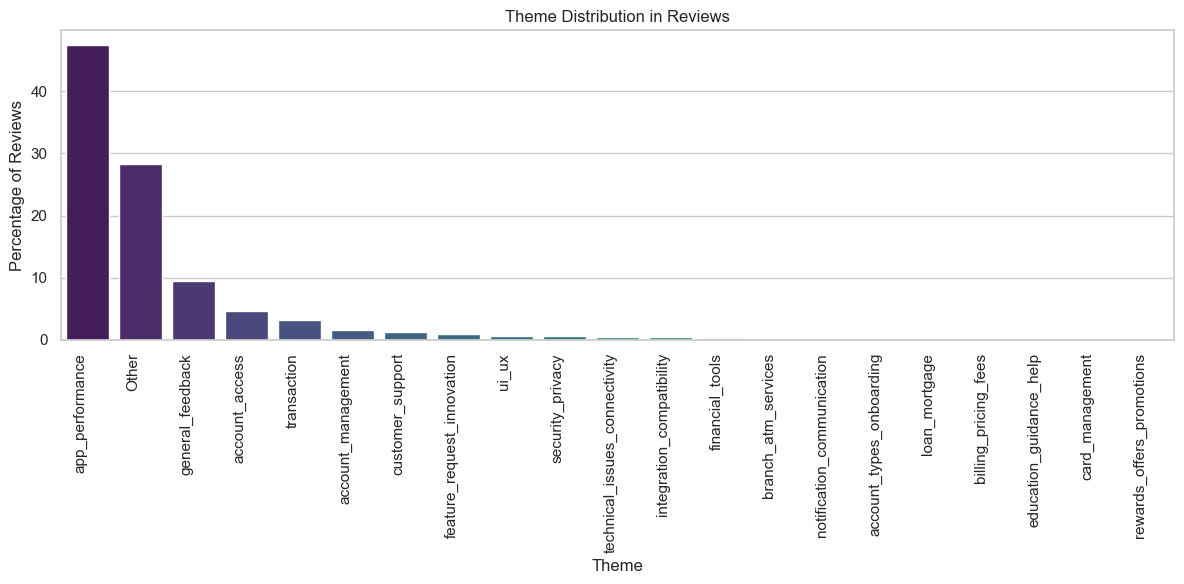

In [21]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.barplot(
    x=theme_distribution.Theme,
    y=theme_distribution.percentage,
    palette="viridis", 
    hue=theme_distribution.Theme,
)
plt.title("Theme Distribution in Reviews")
plt.xlabel("Theme")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig("../reports/figures/theme_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
theme_app_performance_negative = analized_reviews[
    (analized_reviews.theme == "app_performance") & 
    (analized_reviews.sentiment_label == "negative")
]

theme_app_performance_negative.head()

,app_id,app_name,user_name,review,rating,thumbs_up_count,date,sentiment_score,sentiment_label,processed_text,theme
11,com.combanketh.mobilebanking,Combanketh,A Google user,it was good app but it have some issues like i...,2,0,2025-06-04 15:56:02,0.001881,negative,good app issue like right bank issue transfer,app_performance
22,com.combanketh.mobilebanking,Combanketh,A Google user,it is like a childish app make it better the w...,1,0,2025-06-02 12:23:42,0.000204,negative,like childish app well bad see,app_performance
60,com.combanketh.mobilebanking,Combanketh,A Google user,its not fast,1,0,2025-05-24 14:02:19,0.005019,negative,fast,app_performance
69,com.combanketh.mobilebanking,Combanketh,A Google user,why you change default network?,5,0,2025-05-23 18:14:51,0.003764,negative,change default network,app_performance
76,com.combanketh.mobilebanking,Combanketh,A Google user,"Very bad, can't even load they need to improve...",1,1,2025-05-22 22:46:06,0.000183,negative,bad load need improve service,app_performance


C:\Users\segni\AppData\Local\Temp\ipykernel_2644\1504770211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


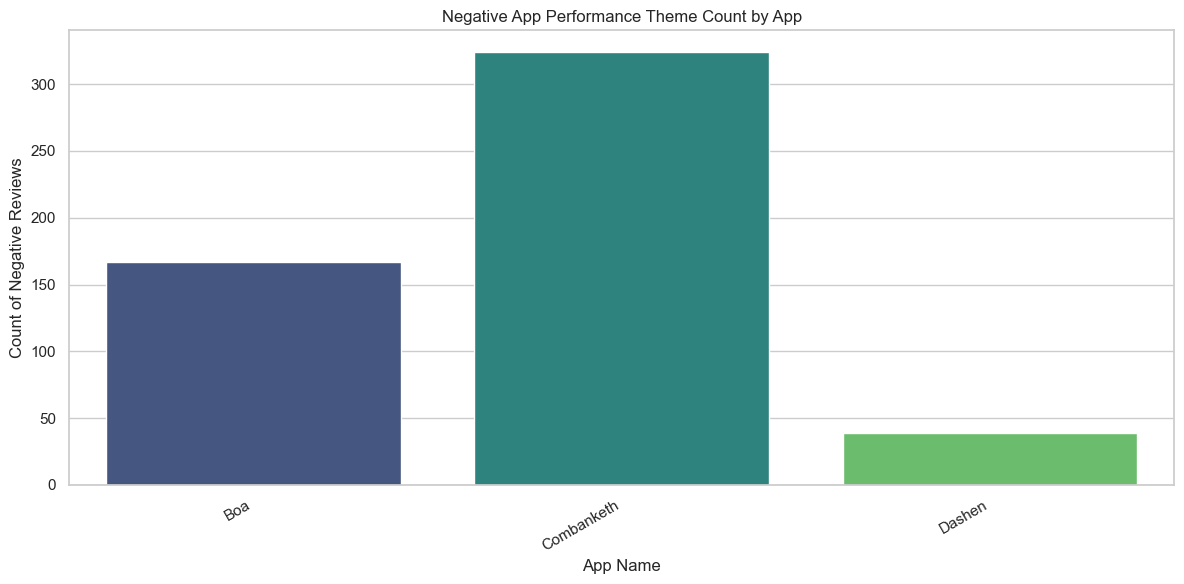

In [24]:
group_by_bank = theme_app_performance_negative.groupby("app_name")["theme"].count().reset_index()
group_by_bank.rename(columns={"theme": "count"}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_by_bank,
    x="app_name",
    y="count",
    palette="viridis"
)
plt.title("Negative App Performance Theme Count by App")
plt.xlabel("App Name")
plt.ylabel("Count of Negative Reviews")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig("../reports/figures/negative_app_performance_by_app.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_2644\95537197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


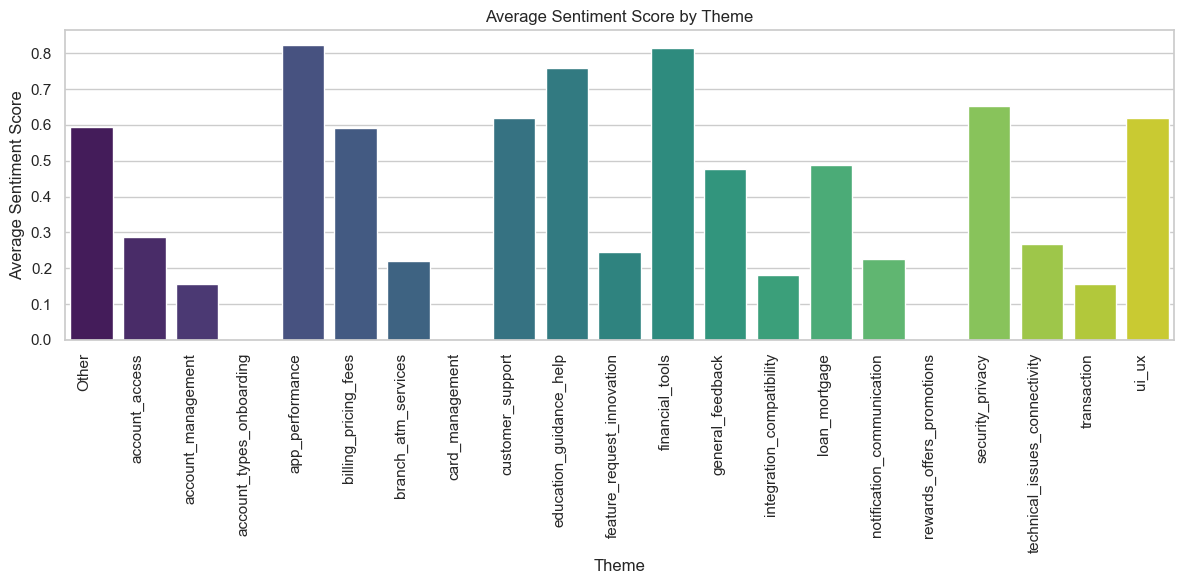

In [26]:
group_sentiment_by_theme = analized_reviews.groupby("theme")["sentiment_score"].mean().reset_index()
group_sentiment_by_theme.rename(columns={"sentiment_score": "average_sentiment"}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_sentiment_by_theme,
    x="theme",
    y="average_sentiment",
    palette="viridis"
)
plt.title("Average Sentiment Score by Theme")
plt.xlabel("Theme")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig("../reports/figures/average_sentiment_by_theme.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_2644\2355671006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


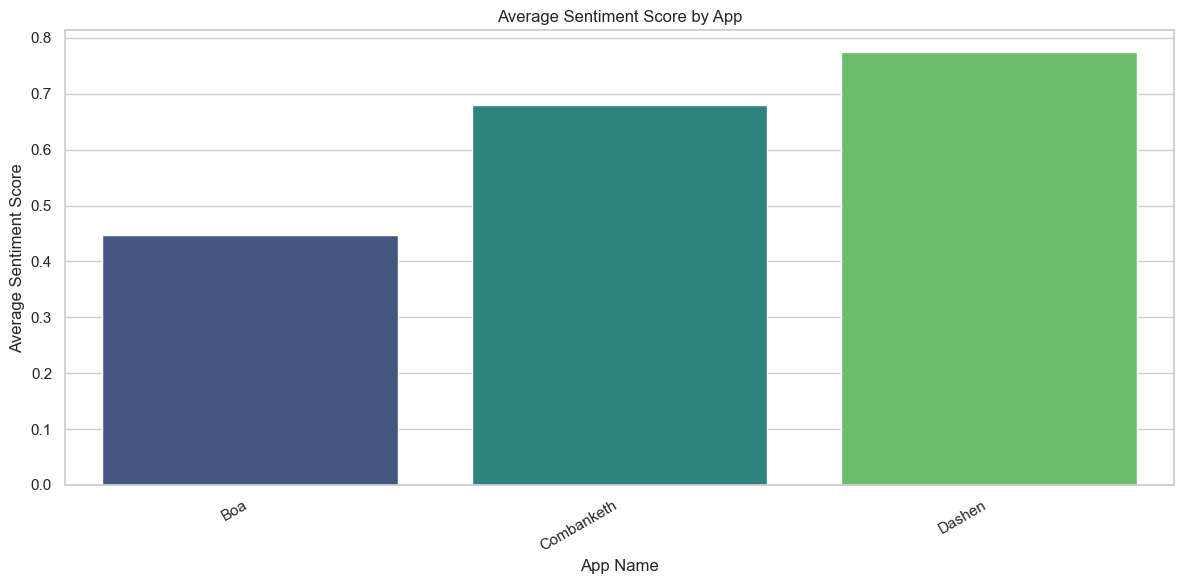

In [27]:
group_sentiment_by_app = analized_reviews.groupby("app_name")["sentiment_score"].mean().reset_index()
group_sentiment_by_app.rename(columns={"sentiment_score": "average_sentiment"}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_sentiment_by_app,
    x="app_name",
    y="average_sentiment",
    palette="viridis"
)
plt.title("Average Sentiment Score by App")
plt.xlabel("App Name")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig("../reports/figures/average_sentiment_by_app.png", dpi=300, bbox_inches="tight")
plt.show()